1022
0.794520547945
[0.55251141552511418, 0.65068493150684936, 0.79452054794520544, 0.79452054794520544, 0.79680365296803657, 0.78995433789954339]
1e-05


<IPython.core.display.Javascript object>


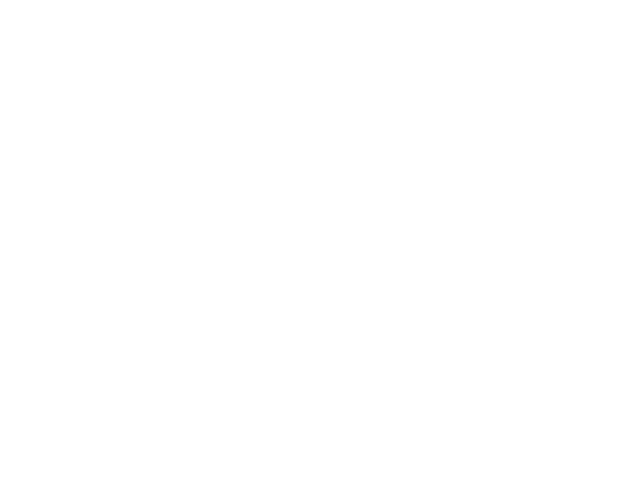

[0.65068493150684936, 0.66438356164383561, 0.65753424657534243, 0.65981735159817356, 0.65981735159817356]
10


<IPython.core.display.Javascript object>


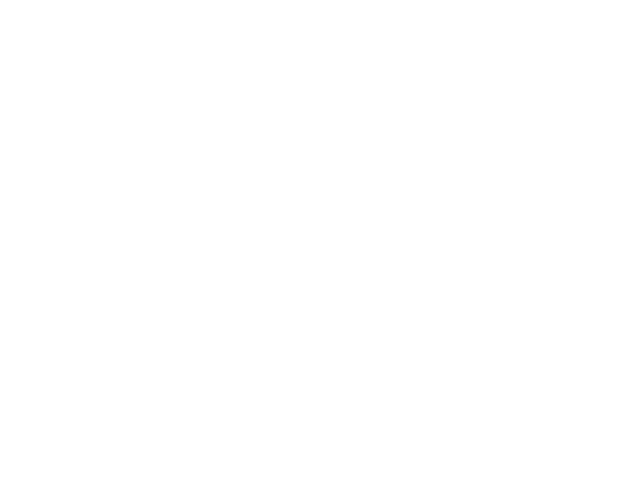

0.931506849315
[0.92922374429223742, 0.93150684931506844, 0.94063926940639264, 0.9360730593607306, 0.94063926940639264]
30


<IPython.core.display.Javascript object>


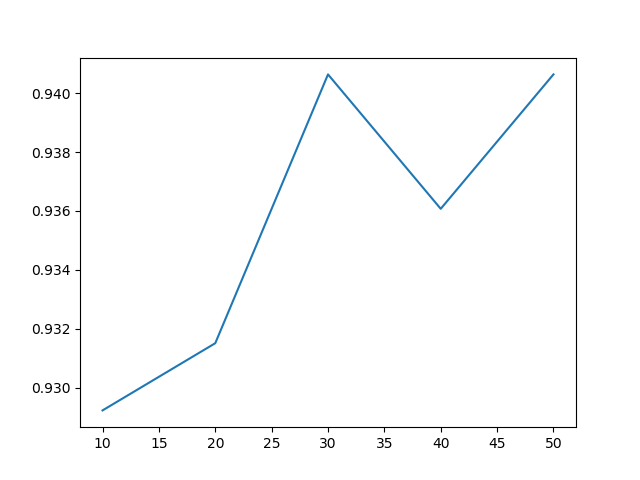

0.929223744292
0.753424657534
0.844748858447
0.812785388128


In [5]:
# from train import get_features_from_input

%run train.py.ipynb

import pandas as pd

# Included the df_train as well since in the get_features_from_input function while doing the 
# one hot encoding we need all the possible features

df_test = pd.read_csv('testSold.csv', index_col=0)
df_train = pd.read_csv('trainSold.csv', index_col=0)
df_train.drop('SaleStatus', axis=1, inplace=True)

df_gt = pd.read_csv('gt.csv', index_col=0)

y = df_gt.as_matrix()

X = get_features_from_input(df_test, df_train)

In [6]:
#Read the models in as input from the model files

import pickle

best_model1 = pickle.load(open('final_model1.pkl', 'rb'))

best_model2 = pickle.load(open('final_model2.pkl', 'rb'))

In [7]:

#Calculating the scores for both the models
sc1 = best_model1.score(X, y)
sc2 = best_model2.score(X, y)

print("Accuracy of model1 is ", sc1)
print("Accuracy of model2 is ", sc2)

Accuracy of model1 is  0.478409869774
Accuracy of model2 is  0.479095270733


In [9]:
#Predict the output for the input data for the better model and saving the output to out.csv
out = []
if (sc1 > sc2):
    out = best_model1.predict(X)
else:
    out = best_model2.predict(X)

out_df = pd.DataFrame({'Id' : df_test.index.values, 'SaleStatus' : out[:]})
out_df.to_csv('out.csv', index=False)